# Questões práticas

## Questão 5

Antes de rodar o código dessa seção, foi rodado a versão original em que vinha a convolução, batch normalization e, em seguida, a função de ativação.

A execução do código original (convolution, batch normalization e ativação) gerou o gráfico abaixo:

![Gráfico de função erro da questão 5](https://raw.githubusercontent.com/rodrigogomesrc/deeplearning-notebooks/main/imagens/51.png)

Para comparação, foi mudada essa ordem para batch normalization, depois convolution e, em seguida, a função de ativação.

Ao comparar o gráfico da versão original com o da versão com a ordem alterada gerado no fim dessa seção, uma mudança que eu posso notar é que o erro no treinamento começou maior na versão alterada, mas convergiram para um valor aproximadamente comum.

Já para o erro na validação, quando foi alterada a ordem ele se apromou mais do erro do treinamento comparado a versão original. Isso denota que ao mudar a ordem houve uma leve melhora na generalização.


In [2]:
%%capture
!pip install d2l==1.0.0-alpha1.post0

In [3]:
%%capture
pip install matplotlib_inline

In [8]:
import tensorflow as tf
from d2l import tensorflow as d2l

class Residual(tf.keras.Model): 
    """The Residual block of ResNet."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(num_channels, padding='same',
                                            kernel_size=3, strides=strides)
        self.conv2 = tf.keras.layers.Conv2D(num_channels, kernel_size=3,
                                            padding='same')
        self.conv3 = None
        if use_1x1conv:
            self.conv3 = tf.keras.layers.Conv2D(num_channels, kernel_size=1,
                                                strides=strides)
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.bn2 = tf.keras.layers.BatchNormalization()

    def call(self, X):
        Y = tf.keras.activations.relu(self.bn1(X))
        Y = self.conv1(Y)
        Y = self.bn2(Y)
        Y = self.conv2(Y)

        if self.conv3 is not None:
            X = self.conv3(X)
        Y += X
        return tf.keras.activations.relu(Y)

In [9]:
blk = Residual(3)
X = tf.random.normal((4, 6, 6, 3))
Y = blk(X)
Y.shape

TensorShape([4, 6, 6, 3])

In [10]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

TensorShape([4, 3, 3, 6])

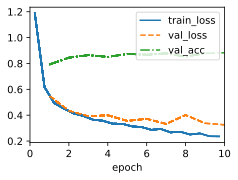

In [11]:
class ResNet(d2l.Classifier):
    def b1(self):
        return tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, kernel_size=7, strides=2,
                                   padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Activation('relu'),
            tf.keras.layers.MaxPool2D(pool_size=3, strides=2,

                                      padding='same')])
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = tf.keras.models.Sequential()
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.add(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.add(Residual(num_channels))
    return blk

@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = tf.keras.models.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add(self.block(*b, first_block=(i==0)))
    self.net.add(tf.keras.models.Sequential([
        tf.keras.layers.GlobalAvgPool2D(),
        tf.keras.layers.Dense(units=num_classes)]))
    

class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 96, 96, 1))

trainer = d2l.Trainer(max_epochs=10)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
with d2l.try_gpu():
    model = ResNet18(lr=0.01)
    trainer.fit(model, data)

Treinamento

## Questão 6

**Baixando e criando os datasets**

Esse código abaixo faz com que o download do dataset funcione, por algum motivo

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown https://drive.google.com/uc?id=10-zHo5EYgf_ZHrhtgUVgd20X9sJVevKL&confirm=t&uuid=1333e4c7-09bc-4eb1-963a-71dc4ada18e1

Downloading...
From: https://drive.google.com/uc?id=10-zHo5EYgf_ZHrhtgUVgd20X9sJVevKL
To: /content/tiny-imagenet-200.zip
100% 248M/248M [00:03<00:00, 74.5MB/s]


In [ ]:
!unzip tiny-imagenet-200.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: tiny-imagenet-200/val/images/val_3979.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9969.JPEG  
  inflating: 

In [ ]:
# import the necessary packages
from os import path

# define the paths to the training and validation directories
TRAIN_IMAGES = "tiny-imagenet-200/train"
VAL_IMAGES = "tiny-imagenet-200/val/images"

# define the path to the file that maps validation filenames to
# their corresponding class labels
VAL_MAPPINGS = "tiny-imagenet-200/val/val_annotations.txt"

# define the paths to the WordNet hierarchy files which are used
# to generate our class labels
WORDNET_IDS = "tiny-imagenet-200/wnids.txt"
WORD_LABELS = "tiny-imagenet-200/words.txt"

# since we do not have access to the testing data we need to
# take a number of images from the training data and use it instead
NUM_CLASSES = 200
NUM_TEST_IMAGES = 50 * NUM_CLASSES

# define the path to the output training, validation, and testing
# HDF5 files
TRAIN_HDF5 = "tiny-imagenet-200/hdf5/train.hdf5"
VAL_HDF5 = "tiny-imagenet-200/hdf5/val.hdf5"
TEST_HDF5 = "tiny-imagenet-200/hdf5/test.hdf5"

# define the path to the dataset mean
DATASET_MEAN = "tiny-imagenet-200/output/tiny-image-net-200-mean.json"

# define the path to the output directory used for storing plots,
# classification reports, etc.
OUTPUT_PATH = "tiny-imagenet-200/output"
MODEL_PATH = path.sep.join([OUTPUT_PATH,"epoch_60.hdf5"])
FIG_PATH = path.sep.join([OUTPUT_PATH,"deepergooglenet_tinyimagenet.png"])
JSON_PATH = path.sep.join([OUTPUT_PATH,"deepergooglenet_tinyimagenet.json"])

In [ ]:
!mkdir tiny-imagenet-200/hdf5
!mkdir tiny-imagenet-200/output

In [ ]:
# import the necessary packages
import h5py
import os

class HDF5DatasetWriter:
	def __init__(self, dims, outputPath, dataKey="images",bufSize=1000):
		# check to see if the output path exists, and if so, raise
		# an exception
		if os.path.exists(outputPath):
			raise ValueError("The supplied `outputPath` already "
				"exists and cannot be overwritten. Manually delete "
				"the file before continuing.", outputPath)

		# open the HDF5 database for writing and create two datasets:
		# one to store the images/features and another to store the
		# class labels
		self.db = h5py.File(outputPath, "w")
		self.data = self.db.create_dataset(dataKey, dims,dtype="float")
		self.labels = self.db.create_dataset("labels", (dims[0],),dtype="int")

		# store the buffer size, then initialize the buffer itself
		# along with the index into the datasets
		self.bufSize = bufSize
		self.buffer = {"data": [], "labels": []}
		self.idx = 0

	def add(self, rows, labels):
		# add the rows and labels to the buffer
		self.buffer["data"].extend(rows)
		self.buffer["labels"].extend(labels)

		# check to see if the buffer needs to be flushed to disk
		if len(self.buffer["data"]) >= self.bufSize:
			self.flush()

	def flush(self):
		# write the buffers to disk then reset the buffer
		i = self.idx + len(self.buffer["data"])
		self.data[self.idx:i] = self.buffer["data"]
		self.labels[self.idx:i] = self.buffer["labels"]
		self.idx = i
		self.buffer = {"data": [], "labels": []}

	def storeClassLabels(self, classLabels):
		# create a dataset to store the actual class label names,
		# then store the class labels
		dt = h5py.special_dtype(vlen=str) # `vlen=unicode` for Py2.7
		labelSet = self.db.create_dataset("label_names",(len(classLabels),), dtype=dt)
		labelSet[:] = classLabels

	def close(self):
		# check to see if there are any other entries in the buffer
		# that need to be flushed to disk
		if len(self.buffer["data"]) > 0:
			self.flush()

		# close the dataset
		self.db.close()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import progressbar
import json
import cv2
import os

# grab the paths to the training images, then extract the training
# class labels and encode them
trainPaths = list(paths.list_images(TRAIN_IMAGES))
trainLabels = [p.split(os.path.sep)[-3] for p in trainPaths]
le = LabelEncoder()
trainLabels = le.fit_transform(trainLabels)

# perform stratified sampling from the training set to construct a
# a testing set
split = train_test_split(trainPaths, trainLabels,test_size=NUM_TEST_IMAGES, 
                         stratify=trainLabels,random_state=42)
(trainPaths, testPaths, trainLabels, testLabels) = split

# load the validation filename => class from file and then use these
# mappings to build the validation paths and label lists
M = open(VAL_MAPPINGS).read().strip().split("\n")
M = [r.split("\t")[:2] for r in M]
valPaths = [os.path.sep.join([VAL_IMAGES, m[0]]) for m in M]
valLabels = le.transform([m[1] for m in M])

# construct a list pairing the training, validation, and testing
# image paths along with their corresponding labels and output HDF5
# files
datasets = [
	("train", trainPaths, trainLabels, TRAIN_HDF5),
	("val", valPaths, valLabels, VAL_HDF5),
	("test", testPaths, testLabels, TEST_HDF5)]

# initialize the lists of RGB channel averages
(R, G, B) = ([], [], [])

# loop over the dataset tuples
for (dType, paths, labels, outputPath) in datasets:
	# create HDF5 writer
	print("[INFO] building {}...".format(outputPath))
	writer = HDF5DatasetWriter((len(paths), 64, 64, 3), outputPath)

	# initialize the progress bar
	widgets = ["Building Dataset: ", progressbar.Percentage(), " ",
            progressbar.Bar(), " ", progressbar.ETA()]
	pbar = progressbar.ProgressBar(maxval=len(paths),widgets=widgets).start()

	# loop over the image paths
	for (i, (path, label)) in enumerate(zip(paths, labels)):
		# load the image from disk
		image = cv2.imread(path)

		# if we are building the training dataset, then compute the
		# mean of each channel in the image, then update the
		# respective lists
		if dType == "train":
			(b, g, r) = cv2.mean(image)[:3]
			R.append(r)
			G.append(g)
			B.append(b)

		# add the image and label to the HDF5 dataset
		writer.add([image], [label])
		pbar.update(i)

	# close the HDF5 writer
	pbar.finish()
	writer.close()

# construct a dictionary of averages, then serialize the means to a
# JSON file
print("[INFO] serializing means...")
D = {"R": np.mean(R), "G": np.mean(G), "B": np.mean(B)}
f = open(DATASET_MEAN, "w")
f.write(json.dumps(D))
f.close()

Building Dataset:   0% |                                       | ETA:   0:00:13

[INFO] building tiny-imagenet-200/hdf5/train.hdf5...


Building Dataset: 100% |#######################################| Time:  0:00:53
Building Dataset:   2% |                                       | ETA:   0:00:07

[INFO] building tiny-imagenet-200/hdf5/val.hdf5...


Building Dataset: 100% |#######################################| Time:  0:00:06
Building Dataset:   1% |                                       | ETA:   0:00:14

[INFO] building tiny-imagenet-200/hdf5/test.hdf5...


Building Dataset: 100% |#######################################| Time:  0:00:08


[INFO] serializing means...


In [ ]:
# evaluate the generated dataset
import h5py

filenames = [TRAIN_HDF5, VAL_HDF5, TEST_HDF5]
for filename in filenames:
  db = h5py.File(filename, "r")
  print(db["images"].shape)
  db.close()

(90000, 64, 64, 3)
(10000, 64, 64, 3)
(10000, 64, 64, 3)


Criandos os pré-processadores

In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import img_to_array

class ImageToArrayPreprocessor:
	def __init__(self, dataFormat=None):
		# store the image data format
		self.dataFormat = dataFormat

	def preprocess(self, image):
		# apply the Keras utility function that correctly rearranges
		# the dimensions of the image
		return img_to_array(image, data_format=self.dataFormat)

In [ ]:
# import the necessary packages
import cv2

class MeanPreprocessor:
	def __init__(self, rMean, gMean, bMean):
		# store the Red, Green, and Blue channel averages across a
		# training set
		self.rMean = rMean
		self.gMean = gMean
		self.bMean = bMean

	def preprocess(self, image):
		# split the image into its respective Red, Green, and Blue
		# channels
		(B, G, R) = cv2.split(image.astype("float32"))

		# subtract the means for each channel
		R -= self.rMean
		G -= self.gMean
		B -= self.bMean

    # Keep in mind that OpenCV represents images in BGR order
		# merge the channels back together and return the image
		return cv2.merge([B, G, R])

In [ ]:
# import the necessary packages
from tensorflow.keras.utils import to_categorical
import numpy as np
import h5py

class HDF5DatasetGenerator:
	def __init__(self, dbPath, batchSize, preprocessors=None, aug=None, binarize=True, classes=2):
		# store the batch size, preprocessors, and data augmentor,
		# whether or not the labels should be binarized, along with
		# the total number of classes
		self.batchSize = batchSize
		self.preprocessors = preprocessors
		self.aug = aug
		self.binarize = binarize
		self.classes = classes

		# open the HDF5 database for reading and determine the total
		# number of entries in the database
		self.db = h5py.File(dbPath, "r")
		self.numImages = self.db["labels"].shape[0]

	def generator(self, passes=np.inf):
		# initialize the epoch count
		epochs = 0

		# keep looping infinitely -- the model will stop once we have
		# reach the desired number of epochs
		while epochs < passes:
			# loop over the HDF5 dataset
			for i in np.arange(0, self.numImages, self.batchSize):
				# extract the images and labels from the HDF dataset
				images = self.db["images"][i: i + self.batchSize]
				labels = self.db["labels"][i: i + self.batchSize]

				# check to see if the labels should be binarized
				if self.binarize:
					labels = to_categorical(labels,
						self.classes)

				# check to see if our preprocessors are not None
				if self.preprocessors is not None:
					# initialize the list of processed images
					procImages = []

					# loop over the images
					for image in images:
						# loop over the preprocessors and apply each
						# to the image
						for p in self.preprocessors:
							image = p.preprocess(image)

						# update the list of processed images
						procImages.append(image)

					# update the images array to be the processed
					# images
					images = np.array(procImages)

				# if the data augmenator exists, apply it
				if self.aug is not None:
					(images, labels) = next(self.aug.flow(images,
						labels, batch_size=self.batchSize))

				# yield a tuple of images and labels
				yield (images, labels)

			# increment the total number of epochs
			epochs += 1

	def close(self):
		# close the database
		self.db.close()

In [ ]:
# import the necessary packages
import cv2

class SimplePreprocessor:
	def __init__(self, width, height, inter=cv2.INTER_AREA):
		# store the target image width, height, and interpolation
		# method used when resizing
		self.width = width
		self.height = height
		self.inter = inter

	def preprocess(self, image):
		# resize the image to a fixed size, ignoring the aspect
		# ratio
		return cv2.resize(image, (self.width, self.height),
			interpolation=self.inter)

In [ ]:
# import the necessary packages
from tensorflow.keras.callbacks import BaseLogger
import matplotlib.pyplot as plt
import numpy as np
import json
import os

class TrainingMonitor(BaseLogger):
	def __init__(self, figPath, jsonPath=None, startAt=0):
		# store the output path for the figure, the path to the JSON
		# serialized file, and the starting epoch
		super(TrainingMonitor, self).__init__()
		self.figPath = figPath
		self.jsonPath = jsonPath
		self.startAt = startAt

	def on_train_begin(self, logs={}):
		# initialize the history dictionary
		self.H = {}

		# if the JSON history path exists, load the training history
		if self.jsonPath is not None:
			if os.path.exists(self.jsonPath):
				self.H = json.loads(open(self.jsonPath).read())

				# check to see if a starting epoch was supplied
				if self.startAt > 0:
					# loop over the entries in the history log and
					# trim any entries that are past the starting
					# epoch
					for k in self.H.keys():
						self.H[k] = self.H[k][:self.startAt]

	def on_epoch_end(self, epoch, logs={}):
		# loop over the logs and update the loss, accuracy, etc.
		# for the entire training process
		for (k, v) in logs.items():
			l = self.H.get(k, [])
			l.append(float(v))
			self.H[k] = l

		# check to see if the training history should be serialized
		# to file
		if self.jsonPath is not None:
			f = open(self.jsonPath, "w")
			f.write(json.dumps(self.H))
			f.close()

		# ensure at least two epochs have passed before plotting
		# (epoch starts at zero)
		if len(self.H["loss"]) > 1:
			# plot the training loss and accuracy
			N = np.arange(0, len(self.H["loss"]))
			plt.style.use("ggplot")
			plt.figure()
			plt.plot(N, self.H["loss"], label="train_loss")
			plt.plot(N, self.H["val_loss"], label="val_loss")
			plt.plot(N, self.H["accuracy"], label="train_acc")
			plt.plot(N, self.H["val_accuracy"], label="val_acc")
			plt.title("Training Loss and Accuracy [Epoch {}]".format(
				len(self.H["loss"])))
			plt.xlabel("Epoch #")
			plt.ylabel("Loss/Accuracy")
			plt.legend()

			# save the figure
			plt.savefig(self.figPath)
			plt.close()

In [ ]:
# import the necessary packages
from tensorflow.keras.callbacks import Callback
import os

class EpochCheckpoint(Callback):
	def __init__(self, outputPath, every=5, startAt=0):
		# call the parent constructor
		super(Callback, self).__init__()

		# store the base output path for the model, the number of
		# epochs that must pass before the model is serialized to
		# disk and the current epoch value
		self.outputPath = outputPath
		self.every = every
		self.intEpoch = startAt

	def on_epoch_end(self, epoch, logs={}):
		# check to see if the model should be serialized to disk
		if (self.intEpoch + 1) % self.every == 0:
			p = os.path.sep.join([self.outputPath,
				"epoch_{}.hdf5".format(self.intEpoch + 1)])
			self.model.save(p, overwrite=True)

		# increment the internal epoch counter
		self.intEpoch += 1

In [ ]:
# import the necessary packages
import numpy as np

def rank5_accuracy(preds, labels):
	# initialize the rank-1 and rank-5 accuracies
	rank1 = 0
	rank5 = 0

	# loop over the predictions and ground-truth labels
	for (p, gt) in zip(preds, labels):
		# sort the probabilities by their index in descending
		# order so that the more confident guesses are at the
		# front of the list
		p = np.argsort(p)[::-1]

		# check if the ground-truth label is in the top-5
		# predictions
		if gt in p[:5]:
			rank5 += 1

		# check to see if the ground-truth is the #1 prediction
		if gt == p[0]:
			rank1 += 1

	# compute the final rank-1 and rank-5 accuracies
	rank1 /= float(len(preds))
	rank5 /= float(len(preds))

	# return a tuple of the rank-1 and rank-5 accuracies
	return (rank1, rank5)

In [ ]:
# import the necessary packages
import numpy as np
import cv2
import os

# helper to load images
class SimpleDatasetLoader:
	def __init__(self, preprocessors=None):
		# store the image preprocessor
		self.preprocessors = preprocessors

		# if the preprocessors are None, initialize them as an
		# empty list
		if self.preprocessors is None:
			self.preprocessors = []

	def load(self, imagePaths, verbose=-1):
		# initialize the list of features and labels
		data = []
		labels = []

		# loop over the input images
		for (i, imagePath) in enumerate(imagePaths):
			# load the image and extract the class label assuming
			# that our path has the following format:
			# /path/to/dataset/{class}/{image}.jpg
			image = cv2.imread(imagePath)
			label = imagePath.split(os.path.sep)[-2]

			# check to see if our preprocessors are not None
			if self.preprocessors is not None:
				# loop over the preprocessors and apply each to
				# the image
				for p in self.preprocessors:
					image = p.preprocess(image)

			# treat our processed image as a "feature vector"
			# by updating the data list followed by the labels
			data.append(image)
			labels.append(label)

			# show an update every `verbose` images
			if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
				print("[INFO] processed {}/{}".format(i + 1,
					len(imagePaths)))

		# return a tuple of the data and labels
		return (np.array(data), np.array(labels))

Criando o treinamento

In [ ]:
# import the necessary packages
from os import path

# define the paths to the training and validation directories
TRAIN_IMAGES = "tiny-imagenet-200/train"
VAL_IMAGES = "tiny-imagenet-200/val/images"

# define the path to the file that maps validation filenames to
# their corresponding class labels
VAL_MAPPINGS = "tiny-imagenet-200/val/val_annotations.txt"

# define the paths to the WordNet hierarchy files which are used
# to generate our class labels
WORDNET_IDS = "tiny-imagenet-200/wnids.txt"
WORD_LABELS = "tiny-imagenet-200/words.txt"

# since we do not have access to the testing data we need to
# take a number of images from the training data and use it instead
NUM_CLASSES = 200
NUM_TEST_IMAGES = 50 * NUM_CLASSES

# define the path to the output training, validation, and testing
# HDF5 files
TRAIN_HDF5 = "tiny-imagenet-200/hdf5/train.hdf5"
VAL_HDF5 = "tiny-imagenet-200/hdf5/val.hdf5"
TEST_HDF5 = "tiny-imagenet-200/hdf5/test.hdf5"

# define the path to the dataset mean
DATASET_MEAN = "tiny-imagenet-200/output/tiny-image-net-200-mean.json"

# define the path to the output directory used for storing plots,
# classification reports, etc.
OUTPUT_PATH = "tiny-imagenet-200/output"
MODEL_PATH = path.sep.join([OUTPUT_PATH,"epoch_40.hdf5"])
FIG_PATH = path.sep.join([OUTPUT_PATH,"deepergooglenet_tinyimagenet.png"])
JSON_PATH = path.sep.join([OUTPUT_PATH,"deepergooglenet_tinyimagenet.json"])

In [ ]:
# Global variables used in the train

RESUME_MODEL = "tiny-imagenet-200/output/epoch_40.hdf5"
RESUME = False
START_EPOCH = 0

### Questão 6 (a)

**Criando o modelo colocando o Batch normalization após a função ReLU**

Não consegui rodar... A primeira vez que eu tentei rodar no notebook em que estava esse código rodou com o seguinte resultado para o últimos epochs:

Epoch 35/40
1406/1406 [==============================] - 193s 137ms/step - loss: 2.8816 - accuracy: 0.4973 - val_loss: 4.2846 - val_accuracy: 0.3047

Epoch 36/40
1406/1406 [==============================] - 200s 142ms/step - loss: 2.8453 - accuracy: 0.5043 - val_loss: 4.2308 - val_accuracy: 0.3115

Epoch 37/40
1406/1406 [==============================] - 184s 131ms/step - loss: 2.8003 - accuracy: 0.5135 - val_loss: 4.0749 - val_accuracy: 0.3264

Epoch 38/40
1406/1406 [==============================] - 204s 145ms/step - loss: 2.7732 - accuracy: 0.5170 - val_loss: 4.1530 - val_accuracy: 0.3201

Epoch 39/40
1406/1406 [==============================] - 183s 130ms/step - loss: 2.7302 - accuracy: 0.5268 - val_loss: 4.3660 - val_accuracy: 0.3118

Epoch 40/40
1406/1406 [==============================] - 202s 144ms/step - loss: 2.7009 - accuracy: 0.5303 - val_loss: 4.2389 - val_accuracy: 0.3164


Mas após rodar esse e tentar rodar o código abaixo com o Batch normalization após o ReLU, acabou o tempo de GPU disponível pra mim. Então os epochs que levavam cerca de 3 minutos, passaram a demorar mais de 2 horas, sendo inviável rodar para essa atividade.

In [ ]:
# import the necessary packages
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K

class DeeperGoogLeNet:
    @staticmethod
    def conv_module(x, K, kX, kY, stride, chanDim,padding="same", reg=0.0005, name=None):
        # initialize the CONV, BN, and RELU layer names
        (convName, bnName, actName) = (None, None, None)

        # if a layer name was supplied, prepend it
        if name is not None:
            convName = name + "_conv"
            bnName = name + "_bn"
            actName = name + "_act"

        # define a CONV => BN => RELU pattern
        x = Conv2D(K, (kX, kY), strides=stride, padding=padding, kernel_regularizer=l2(reg), name=convName)(x)
        x = Activation("relu", name=actName)(x)
        x = BatchNormalization(axis=chanDim, name=bnName)(x)
        

        # return the block
        return x

    @staticmethod
    def inception_module(x, num1x1, num3x3Reduce, num3x3,num5x5Reduce, num5x5, num1x1Proj, chanDim, stage, reg=0.0005):
        # define the first branch of the Inception module which
        # consists of 1x1 convolutions
        first = DeeperGoogLeNet.conv_module(x, num1x1, 1, 1,
            (1, 1), chanDim, reg=reg, name=stage + "_first")

        # define the second branch of the Inception module which
        # consists of 1x1 and 3x3 convolutions
        second = DeeperGoogLeNet.conv_module(x, num3x3Reduce, 1, 1, (1, 1), chanDim, reg=reg, name=stage + "_second1")
        second = DeeperGoogLeNet.conv_module(second, num3x3, 3, 3,  (1, 1), chanDim, reg=reg, name=stage + "_second2")

        # define the third branch of the Inception module which
        # are our 1x1 and 5x5 convolutions
        third = DeeperGoogLeNet.conv_module(x, num5x5Reduce, 1, 1, (1, 1), chanDim, reg=reg, name=stage + "_third1")
        third = DeeperGoogLeNet.conv_module(third, num5x5, 5, 5, (1, 1), chanDim, reg=reg, name=stage + "_third2")

        # define the fourth branch of the Inception module which
        # is the POOL projection
        fourth = MaxPooling2D((3, 3), strides=(1, 1), padding="same", name=stage + "_pool")(x)
        fourth = DeeperGoogLeNet.conv_module(fourth, num1x1Proj, 1, 1, (1, 1), chanDim, reg=reg, name=stage + "_fourth")

        # concatenate across the channel dimension
        x = concatenate([first, second, third, fourth], axis=chanDim,
            name=stage + "_mixed")

        # return the block
        return x

    @staticmethod
    def build(width, height, depth, classes, reg=0.0005):
        # initialize the input shape to be "channels last" and the
        # channels dimension itself
        inputShape = (height, width, depth)
        chanDim = -1

        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # define the model input, followed by a sequence of CONV =>
        # POOL => (CONV * 2) => POOL layers
        inputs = Input(shape=inputShape)
        x = DeeperGoogLeNet.conv_module(inputs, 64, 5, 5, (1, 1), chanDim, reg=reg, name="block1")
        x = MaxPooling2D((3, 3), strides=(2, 2), padding="same", name="pool1")(x)
        x = DeeperGoogLeNet.conv_module(x, 64, 1, 1, (1, 1), chanDim, reg=reg, name="block2")
        x = DeeperGoogLeNet.conv_module(x, 192, 3, 3, (1, 1), chanDim, reg=reg, name="block3")
        x = MaxPooling2D((3, 3), strides=(2, 2), padding="same", name="pool2")(x)

        # apply two Inception modules followed by a POOL
        x = DeeperGoogLeNet.inception_module(x, 64, 96, 128, 16, 32, 32, chanDim, "3a", reg=reg)
        x = DeeperGoogLeNet.inception_module(x, 128, 128, 192, 32, 96, 64, chanDim, "3b", reg=reg)
        x = MaxPooling2D((3, 3), strides=(2, 2), padding="same", name="pool3")(x)

        # apply five Inception modules followed by POOL
        x = DeeperGoogLeNet.inception_module(x, 192, 96, 208, 16, 48, 64, chanDim, "4a", reg=reg)
        x = DeeperGoogLeNet.inception_module(x, 160, 112, 224, 24, 64, 64, chanDim, "4b", reg=reg)
        x = DeeperGoogLeNet.inception_module(x, 128, 128, 256, 24, 64, 64, chanDim, "4c", reg=reg)
        x = DeeperGoogLeNet.inception_module(x, 112, 144, 288, 32, 64, 64, chanDim, "4d", reg=reg)
        x = DeeperGoogLeNet.inception_module(x, 256, 160, 320, 32, 128, 128, chanDim, "4e", reg=reg)
        x = MaxPooling2D((3, 3), strides=(2, 2), padding="same", name="pool4")(x)

        # apply a POOL layer (average) followed by dropout
        x = AveragePooling2D((4, 4), name="pool5")(x)
        x = Dropout(0.4, name="do")(x)

        # softmax classifier
        x = Flatten(name="flatten")(x)
        x = Dense(classes, kernel_regularizer=l2(reg), name="labels")(x)
        x = Activation("softmax", name="softmax")(x)

        # create the model
        model = Model(inputs, x, name="googlenet")

        # return the constructed network architecture
        return model

In [ ]:
model = DeeperGoogLeNet.build(64,64,3,200)
#model.summary()

In [ ]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K
import argparse
import json

# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=18, zoom_range=0.15, 
                         width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
                         horizontal_flip=True, fill_mode="nearest")

# load the RGB means for the training set
means = json.loads(open(DATASET_MEAN).read())

# initialize the image preprocessors
sp = SimplePreprocessor(64, 64)
mp = MeanPreprocessor(means["R"], means["G"], means["B"])
iap = ImageToArrayPreprocessor()

# initialize the training and validation dataset generators
trainGen = HDF5DatasetGenerator(TRAIN_HDF5, 64, aug=aug,
                                preprocessors=[sp, mp, iap], classes=NUM_CLASSES)
valGen = HDF5DatasetGenerator(VAL_HDF5, 64,
                              preprocessors=[sp, mp, iap], classes=NUM_CLASSES)

In [ ]:
# if there is no specific model checkpoint supplied, then initialize the network and compile the model
if not RESUME:
  print("[INFO] compiling model...")
  model = DeeperGoogLeNet.build(width=64, height=64, depth=3, classes=NUM_CLASSES, reg=0.0002)
  opt = SGD(1e-3,momentum=0.9)
  model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
# otherwise, load the checkpoint from disk
else:
  print("[INFO] loading {}...".format(RESUME_MODEL))
  model = load_model(RESUME_MODEL)

  # update the learning rate
  print("[INFO] old learning rate: {}".format(K.get_value(model.optimizer.lr)))
  K.set_value(model.optimizer.lr, 1e-5)
  print("[INFO] new learning rate: {}".format(K.get_value(model.optimizer.lr)))

[INFO] compiling model...


In [ ]:
# construct the set of callbacks
callbacks = [EpochCheckpoint("tiny-imagenet-200/output",every=5,startAt=START_EPOCH),
             TrainingMonitor(FIG_PATH, 
                             jsonPath=JSON_PATH,
                             startAt=START_EPOCH)]

Treinando...

In [ ]:
# train the network
model.fit(trainGen.generator(),
          steps_per_epoch=trainGen.numImages // 64,
          validation_data=valGen.generator(),
          validation_steps=valGen.numImages // 64,
          epochs=40,
          max_queue_size=10,
          callbacks=callbacks, verbose=1,initial_epoch=START_EPOCH)

# close the databases
trainGen.close()
valGen.close()

Epoch 1/40
1406/1406 [==============================] - 185s 128ms/step - loss: 6.5381 - accuracy: 0.0327 - val_loss: 5.7463 - val_accuracy: 0.0790
Epoch 2/40
1406/1406 [==============================] - 188s 133ms/step - loss: 5.7244 - accuracy: 0.0783 - val_loss: 5.3934 - val_accuracy: 0.1112
Epoch 3/40
1406/1406 [==============================] - 177s 126ms/step - loss: 5.3826 - accuracy: 0.1099 - val_loss: 5.3079 - val_accuracy: 0.1243
Epoch 4/40
1406/1406 [==============================] - 176s 125ms/step - loss: 5.1340 - accuracy: 0.1422 - val_loss: 5.1316 - val_accuracy: 0.1470
Epoch 5/40
1406/1406 [==============================] - 176s 125ms/step - loss: 4.9345 - accuracy: 0.1670 - val_loss: 4.9729 - val_accuracy: 0.1693
Epoch 6/40
1406/1406 [==============================] - 176s 125ms/step - loss: 4.7608 - accuracy: 0.1918 - val_loss: 4.8553 - val_accuracy: 0.1851
Epoch 7/40
1406/1406 [==============================] - 178s 127ms/step - loss: 4.6158 - accuracy: 0.2142 - val_

In [ ]:
from tensorflow.keras.models import load_model
import json

# load the RGB means for the training set
means = json.loads(open(DATASET_MEAN).read())

# initialize the image preprocessors
sp = SimplePreprocessor(64, 64)
mp = MeanPreprocessor(means["R"], means["G"], means["B"])
iap = ImageToArrayPreprocessor()

# initialize the testing dataset generator
testGen = HDF5DatasetGenerator(TEST_HDF5, 64, 
                               preprocessors=[sp, mp, iap],
                               classes=NUM_CLASSES)

# load the pre-trained network
print("[INFO] loading model...")
model = load_model(MODEL_PATH)

In [ ]:
# make predictions on the testing data
print("[INFO] predicting on test data...")
predictions = model.predict(testGen.generator(),
                            steps=testGen.numImages // 64,
                            max_queue_size=10)

# compute the rank-1 and rank-5 accuracies
(rank1, rank5) = rank5_accuracy(predictions, testGen.db["labels"])
print("[INFO] rank-1: {:.2f}%".format(rank1 * 100))
print("[INFO] rank-5: {:.2f}%".format(rank5 * 100))

# close the database
testGen.close()

### Questão 6(b)

**Usando "Elu" como função de ativação em vez de "ReLU"**

In [1]:
# import the necessary packages
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K

class DeeperGoogLeNet:
    @staticmethod
    def conv_module(x, K, kX, kY, stride, chanDim,padding="same", reg=0.0005, name=None):
        # initialize the CONV, BN, and ELU layer names
        (convName, bnName, actName) = (None, None, None)

        # if a layer name was supplied, prepend it
        if name is not None:
            convName = name + "_conv"
            bnName = name + "_bn"
            actName = name + "_act"

        # define a CONV => BN => ELU pattern
        x = Conv2D(K, (kX, kY), strides=stride, padding=padding, kernel_regularizer=l2(reg), name=convName)(x)
        x = Activation("elu", name=actName)(x)
        x = BatchNormalization(axis=chanDim, name=bnName)(x)
        

        # return the block
        return x

    @staticmethod
    def inception_module(x, num1x1, num3x3Reduce, num3x3,num5x5Reduce, num5x5, num1x1Proj, chanDim, stage, reg=0.0005):
        # define the first branch of the Inception module which
        # consists of 1x1 convolutions
        first = DeeperGoogLeNet.conv_module(x, num1x1, 1, 1,
            (1, 1), chanDim, reg=reg, name=stage + "_first")

        # define the second branch of the Inception module which
        # consists of 1x1 and 3x3 convolutions
        second = DeeperGoogLeNet.conv_module(x, num3x3Reduce, 1, 1, (1, 1), chanDim, reg=reg, name=stage + "_second1")
        second = DeeperGoogLeNet.conv_module(second, num3x3, 3, 3,  (1, 1), chanDim, reg=reg, name=stage + "_second2")

        # define the third branch of the Inception module which
        # are our 1x1 and 5x5 convolutions
        third = DeeperGoogLeNet.conv_module(x, num5x5Reduce, 1, 1, (1, 1), chanDim, reg=reg, name=stage + "_third1")
        third = DeeperGoogLeNet.conv_module(third, num5x5, 5, 5, (1, 1), chanDim, reg=reg, name=stage + "_third2")

        # define the fourth branch of the Inception module which
        # is the POOL projection
        fourth = MaxPooling2D((3, 3), strides=(1, 1), padding="same", name=stage + "_pool")(x)
        fourth = DeeperGoogLeNet.conv_module(fourth, num1x1Proj, 1, 1, (1, 1), chanDim, reg=reg, name=stage + "_fourth")

        # concatenate across the channel dimension
        x = concatenate([first, second, third, fourth], axis=chanDim,
            name=stage + "_mixed")

        # return the block
        return x

    @staticmethod
    def build(width, height, depth, classes, reg=0.0005):
        # initialize the input shape to be "channels last" and the
        # channels dimension itself
        inputShape = (height, width, depth)
        chanDim = -1

        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # define the model input, followed by a sequence of CONV =>
        # POOL => (CONV * 2) => POOL layers
        inputs = Input(shape=inputShape)
        x = DeeperGoogLeNet.conv_module(inputs, 64, 5, 5, (1, 1), chanDim, reg=reg, name="block1")
        x = MaxPooling2D((3, 3), strides=(2, 2), padding="same", name="pool1")(x)
        x = DeeperGoogLeNet.conv_module(x, 64, 1, 1, (1, 1), chanDim, reg=reg, name="block2")
        x = DeeperGoogLeNet.conv_module(x, 192, 3, 3, (1, 1), chanDim, reg=reg, name="block3")
        x = MaxPooling2D((3, 3), strides=(2, 2), padding="same", name="pool2")(x)

        # apply two Inception modules followed by a POOL
        x = DeeperGoogLeNet.inception_module(x, 64, 96, 128, 16, 32, 32, chanDim, "3a", reg=reg)
        x = DeeperGoogLeNet.inception_module(x, 128, 128, 192, 32, 96, 64, chanDim, "3b", reg=reg)
        x = MaxPooling2D((3, 3), strides=(2, 2), padding="same", name="pool3")(x)

        # apply five Inception modules followed by POOL
        x = DeeperGoogLeNet.inception_module(x, 192, 96, 208, 16, 48, 64, chanDim, "4a", reg=reg)
        x = DeeperGoogLeNet.inception_module(x, 160, 112, 224, 24, 64, 64, chanDim, "4b", reg=reg)
        x = DeeperGoogLeNet.inception_module(x, 128, 128, 256, 24, 64, 64, chanDim, "4c", reg=reg)
        x = DeeperGoogLeNet.inception_module(x, 112, 144, 288, 32, 64, 64, chanDim, "4d", reg=reg)
        x = DeeperGoogLeNet.inception_module(x, 256, 160, 320, 32, 128, 128, chanDim, "4e", reg=reg)
        x = MaxPooling2D((3, 3), strides=(2, 2), padding="same", name="pool4")(x)

        # apply a POOL layer (average) followed by dropout
        x = AveragePooling2D((4, 4), name="pool5")(x)
        x = Dropout(0.4, name="do")(x)

        # softmax classifier
        x = Flatten(name="flatten")(x)
        x = Dense(classes, kernel_regularizer=l2(reg), name="labels")(x)
        x = Activation("softmax", name="softmax")(x)

        # create the model
        model = Model(inputs, x, name="googlenet")

        # return the constructed network architecture
        return model

In [2]:
model = DeeperGoogLeNet.build(64,64,3,200)
model.summary()

Model: "googlenet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 block1_conv (Conv2D)           (None, 64, 64, 64)   4864        ['input_1[0][0]']                
                                                                                                  
 block1_act (Activation)        (None, 64, 64, 64)   0           ['block1_conv[0][0]']            
                                                                                                  
 block1_bn (BatchNormalization)  (None, 64, 64, 64)  256         ['block1_act[0][0]']             
                                                                                          

In [ ]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K
import argparse
import json

# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=18, zoom_range=0.15, 
                         width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
                         horizontal_flip=True, fill_mode="nearest")

# load the RGB means for the training set
means = json.loads(open(DATASET_MEAN).read())

# initialize the image preprocessors
sp = SimplePreprocessor(64, 64)
mp = MeanPreprocessor(means["R"], means["G"], means["B"])
iap = ImageToArrayPreprocessor()

# initialize the training and validation dataset generators
trainGen = HDF5DatasetGenerator(TRAIN_HDF5, 64, aug=aug,
                                preprocessors=[sp, mp, iap], classes=NUM_CLASSES)
valGen = HDF5DatasetGenerator(VAL_HDF5, 64,
                              preprocessors=[sp, mp, iap], classes=NUM_CLASSES)

In [ ]:
# if there is no specific model checkpoint supplied, then initialize the network and compile the model
if not RESUME:
  print("[INFO] compiling model...")
  model = DeeperGoogLeNet.build(width=64, height=64, depth=3, classes=NUM_CLASSES, reg=0.0002)
  opt = SGD(1e-3,momentum=0.9)
  model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
# otherwise, load the checkpoint from disk
else:
  print("[INFO] loading {}...".format(RESUME_MODEL))
  model = load_model(RESUME_MODEL)

  # update the learning rate
  print("[INFO] old learning rate: {}".format(K.get_value(model.optimizer.lr)))
  K.set_value(model.optimizer.lr, 1e-5)
  print("[INFO] new learning rate: {}".format(K.get_value(model.optimizer.lr)))

In [ ]:
# construct the set of callbacks
callbacks = [EpochCheckpoint("tiny-imagenet-200/output",every=5,startAt=START_EPOCH),
             TrainingMonitor(FIG_PATH, 
                             jsonPath=JSON_PATH,
                             startAt=START_EPOCH)]

Treinando...

In [ ]:
# train the network
model.fit(trainGen.generator(),
          steps_per_epoch=trainGen.numImages // 64,
          validation_data=valGen.generator(),
          validation_steps=valGen.numImages // 64,
          epochs=40,
          max_queue_size=10,
          callbacks=callbacks, verbose=1,initial_epoch=START_EPOCH)

# close the databases
trainGen.close()
valGen.close()

## Questão 7

Para a questão 7, foi alterado o dataset do exemplo para usar o [dataset](https://www.kaggle.com/datasets/ash2703/handsignimages) com imagens de sinais com a mão.

In [12]:
%%capture
pip install d2l==1.0.0-alpha1.post0 

In [13]:
import tensorflow as tf
from d2l import tensorflow as d2l

In [14]:
!gdown https://drive.google.com/uc?id=11sZzARg-eGw1kQGvj6Ziz8eXMoHJfPww&export=download&confirm=t

Downloading...
From: https://drive.google.com/uc?id=11sZzARg-eGw1kQGvj6Ziz8eXMoHJfPww
To: /content/Train.zip
100% 20.3M/20.3M [00:01<00:00, 14.3MB/s]


In [15]:
!unzip Train.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: Train/U/4238_U.jpg      
  inflating: Train/U/4243_U.jpg      
  inflating: Train/U/4259_U.jpg      
  inflating: Train/U/4276_U.jpg      
  inflating: Train/U/4284_U.jpg      
  inflating: Train/U/4309_U.jpg      
  inflating: Train/U/4311_U.jpg      
  inflating: Train/U/4321_U.jpg      
  inflating: Train/U/4348_U.jpg      
  inflating: Train/U/4351_U.jpg      
  inflating: Train/U/4352_U.jpg      
  inflating: Train/U/4390_U.jpg      
  inflating: Train/U/4424_U.jpg      
  inflating: Train/U/4488_U.jpg      
  inflating: Train/U/4500_U.jpg      
  inflating: Train/U/4564_U.jpg      
  inflating: Train/U/4578_U.jpg      
  inflating: Train/U/4579_U.jpg      
  inflating: Train/U/4605_U.jpg      
  inflating: Train/U/4607_U.jpg      
  inflating: Train/U/460_U.jpg       
  inflating: Train/U/4620_U.jpg      
  inflating: Train/U/4642_U.jpg      
  inflating: Train/U/4647_U.jpg      
  inflating: Train/U/4673_U.j

In [16]:
batch_size = 256
data_dir = "/content/Train"
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, batch_size=batch_size, image_size=(64, 64))

Found 27359 files belonging to 24 classes.


In [17]:
def transform_func(X):
    X = X / 255.
    X = (X - 0.5) / (0.5)
    return X

# For TF>=2.4 use `num_parallel_calls = tf.data.AUTOTUNE`
data_iter = dataset.map(lambda x, y: (transform_func(x), y),
                        num_parallel_calls=tf.data.experimental.AUTOTUNE)

data_iter = data_iter.cache().shuffle(buffer_size=1000).prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE)

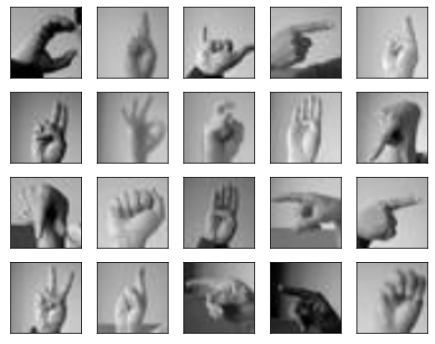

In [18]:
d2l.set_figsize(figsize=(4, 4))
for X, y in data_iter.take(1):
    imgs = X[:20, :, :, :] / 2 + 0.5
    d2l.show_images(imgs, num_rows=4, num_cols=5)

Podemos ver acima imagens de exemplo do dataset escolhido.

Generator

In [19]:
class G_block(tf.keras.layers.Layer):
    def __init__(self, out_channels, kernel_size=4, strides=2, padding="same",
                 **kwargs):
        super().__init__(**kwargs)
        self.conv2d_trans = tf.keras.layers.Conv2DTranspose(
            out_channels, kernel_size, strides, padding, use_bias=False)
        self.batch_norm = tf.keras.layers.BatchNormalization()
        self.activation = tf.keras.layers.ReLU()

    def call(self, X):
        return self.activation(self.batch_norm(self.conv2d_trans(X)))

In [20]:
x = tf.zeros((2, 16, 16, 3))  # Channel last convention
g_blk = G_block(20)
g_blk(x).shape

TensorShape([2, 32, 32, 20])

In [21]:
x = tf.zeros((2, 1, 1, 3))
# `padding="valid"` corresponds to no padding
g_blk = G_block(20, strides=1, padding="valid")
g_blk(x).shape

TensorShape([2, 4, 4, 20])

In [22]:
n_G = 64
net_G = tf.keras.Sequential([
    # Output: (4, 4, 64 * 8)
    G_block(out_channels=n_G*8, strides=1, padding="valid"),
    G_block(out_channels=n_G*4), # Output: (8, 8, 64 * 4)
    G_block(out_channels=n_G*2), # Output: (16, 16, 64 * 2)
    G_block(out_channels=n_G), # Output: (32, 32, 64)
    # Output: (64, 64, 3)
    tf.keras.layers.Conv2DTranspose(
        3, kernel_size=4, strides=2, padding="same", use_bias=False,
        activation="tanh")
])

In [23]:
x = tf.zeros((1, 1, 1, 100))
net_G(x).shape

TensorShape([1, 64, 64, 3])

Discriminator

In [24]:
class D_block(tf.keras.layers.Layer):
    def __init__(self, out_channels, kernel_size=4, strides=2, padding="same",
                 alpha=0.2, **kwargs):
        super().__init__(**kwargs)
        self.conv2d = tf.keras.layers.Conv2D(out_channels, kernel_size,
                                             strides, padding, use_bias=False)
        self.batch_norm = tf.keras.layers.BatchNormalization()
        self.activation = tf.keras.layers.LeakyReLU(alpha)

    def call(self, X):
        return self.activation(self.batch_norm(self.conv2d(X)))

In [25]:
x = tf.zeros((2, 16, 16, 3))
d_blk = D_block(20)
d_blk(x).shape

TensorShape([2, 8, 8, 20])

In [26]:
n_D = 64
net_D = tf.keras.Sequential([
    D_block(n_D), # Output: (32, 32, 64)
    D_block(out_channels=n_D*2), # Output: (16, 16, 64 * 2)
    D_block(out_channels=n_D*4), # Output: (8, 8, 64 * 4)
    D_block(out_channels=n_D*8), # Outupt: (4, 4, 64 * 64)
    # Output: (1, 1, 1)
    tf.keras.layers.Conv2D(1, kernel_size=4, use_bias=False)
])

In [27]:
x = tf.zeros((1, 64, 64, 3))
net_D(x).shape

TensorShape([1, 1, 1, 1])

Treinamento

In [28]:
def train(net_D, net_G, data_iter, num_epochs, lr, latent_dim,
          device=d2l.try_gpu()):
    loss = tf.keras.losses.BinaryCrossentropy(
        from_logits=True, reduction=tf.keras.losses.Reduction.SUM)

    for w in net_D.trainable_variables:
        w.assign(tf.random.normal(mean=0, stddev=0.02, shape=w.shape))
    for w in net_G.trainable_variables:
        w.assign(tf.random.normal(mean=0, stddev=0.02, shape=w.shape))

    optimizer_hp = {"lr": lr, "beta_1": 0.5, "beta_2": 0.999}
    optimizer_D = tf.keras.optimizers.Adam(**optimizer_hp)
    optimizer_G = tf.keras.optimizers.Adam(**optimizer_hp)

    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[1, num_epochs], nrows=2, figsize=(5, 5),
                            legend=['discriminator', 'generator'])
    animator.fig.subplots_adjust(hspace=0.3)

    for epoch in range(1, num_epochs + 1):
        # Train one epoch
        timer = d2l.Timer()
        metric = d2l.Accumulator(3) # loss_D, loss_G, num_examples
        for X, _ in data_iter:
            batch_size = X.shape[0]
            Z = tf.random.normal(mean=0, stddev=1,
                                 shape=(batch_size, 1, 1, latent_dim))
            metric.add(d2l.update_D(X, Z, net_D, net_G, loss, optimizer_D),
                       d2l.update_G(Z, net_D, net_G, loss, optimizer_G),
                       batch_size)

        # Show generated examples
        Z = tf.random.normal(mean=0, stddev=1, shape=(21, 1, 1, latent_dim))
        # Normalize the synthetic data to N(0, 1)
        fake_x = net_G(Z) / 2 + 0.5
        imgs = tf.concat([tf.concat([fake_x[i * 7 + j] for j in range(7)],
                                    axis=1)
                          for i in range(len(fake_x) // 7)], axis=0)
        animator.axes[1].cla()
        animator.axes[1].imshow(imgs)
        # Show the losses
        loss_D, loss_G = metric[0] / metric[2], metric[1] / metric[2]
        animator.add(epoch, (loss_D, loss_G))
    print(f'loss_D {loss_D:.3f}, loss_G {loss_G:.3f}, '
          f'{metric[2] / timer.stop():.1f} examples/sec on {str(device._device_name)}')

loss_D 0.298, loss_G 2.617, 666.6 examples/sec on /GPU:0


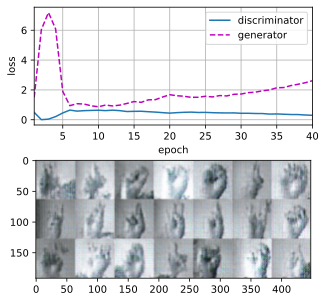

In [29]:
latent_dim, lr, num_epochs = 100, 0.0005, 40
train(net_D, net_G, data_iter, num_epochs, lr, latent_dim)

Nas imagens acima são as imagens geradas pelo Generator através do dataset utilizado.

Se olharmos para o gráfico do valor do erro para o descriminator e para o generator, vemos que depois da epoch 10 o Generator foi progressivamente pior em gerar novas imagens.

A princípio pode-se pensar que poderia usar stop-early para parar o treinamento antes do erro começar a aumentar.

Mas tem que ser pensado bem, porque o progressivo aumento do erro para o Generator ao mesmo tempo em que o erro diminui para o Discriminator faz com que não necessariamente o Generator tenha ficado pior em criar imagens, mas sim que o Descriminator ficou melhor em diferenciar as imagens geradas das reais.